### ECAPA-TDNN (SpeechBrain, PyTorch)
State-of-the-art & robust embeddings.

- SpeechBrain is an open-source, all-in-one speech toolkit based on PyTorch. 

- The ECAPA-TDNN model is a state-of-the-art speaker recognition model that is robust to noise and reverberation. The model is trained on the VoxCeleb dataset.
- Pretrained model available at: https://huggingface.co/speechbrain/spkrec-ecapa-voxceleb

In [ ]:
!pip install speechbrain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 KB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 3.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.1 MB/s eta 0:00:00a 0:00:01
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (751 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 KB 1.5 MB/s eta 0:00:0000:0100:01


In [5]:
from speechbrain.pretrained import EncoderClassifier

# Load pretrained ECAPA-TDNN
classifier = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", 
                                            savedir="pretrained_models/spkrec-ecapa")


import librosa
import torch

sample_wav_path = '../data/iemocap/Session4/sentences/wav/Ses04F_impro01/Ses04F_impro01_F000.wav'
signal_np, sr = librosa.load(sample_wav_path, sr=16000)
signal = torch.from_numpy(signal_np).unsqueeze(0)

print(f"Signal shape after librosa loading: {signal.shape}")

embedding = classifier.encode_batch(signal)  # [1, 1, embedding_dim]
embedding = embedding.squeeze(0).squeeze(0)  # [embedding_dim]

print(f"Embedding shape: {embedding.shape}")



INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch label_encoder.txt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: embedding_model, mean_var_norm_emb, classifier, label_encoder


Signal shape after librosa loading: torch.Size([1, 190079])
Embedding shape: torch.Size([192])


### Visualizing Embeddings 


In [ ]:
import os
os.listdir("../data/iemocap")


['Session5', 'Session2', 'Session1', 'Session3', 'Session4']

In [10]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier
from speechbrain.dataio.dataio import read_audio
from collections import defaultdict

# Load pretrained ECAPA-TDNN
classifier = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb",
                                            savedir="pretrained_models/spkrec-ecapa")

base_dir = "../data/iemocap"
sessions = [f"Session{i}" for i in range(1, 6)]

embeddings = []
labels = []

for session in sessions:
    wav_dir = os.path.join(base_dir, session, "sentences", "wav")
    
    # Map: speaker_id -> list of file paths
    speaker_files = defaultdict(list)

    for root, _, files in os.walk(wav_dir):
        for file in files:
            if file.endswith(".wav"):
                speaker_id = file.split("_")[0]
                full_path = os.path.join(root, file)
                speaker_files[speaker_id].append(full_path)

    # Limit to 2 speakers per session
    for speaker_id in list(speaker_files.keys())[:2]:
        paths = speaker_files[speaker_id][:5]  # 5 samples per speaker

        for audio_path in paths:
            signal = read_audio(audio_path).unsqueeze(0)  # [1, T]
            embedding = classifier.encode_batch(signal).squeeze(0).squeeze(0)  # [192]

            embeddings.append(embedding.detach().cpu())
            labels.append(f"{session}_{speaker_id}")

            print(f"Processed: {session}/{speaker_id} - {audio_path}")

print(f"\nTotal embeddings extracted: {len(embeddings)}")  # Should be 50


INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch label_encoder.txt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: embedding_model, mean_var_norm_emb, classifier, label_encoder


Processed: Session1/Ses01F - ../data/iemocap/Session1/sentences/wav/Ses01F_impro02/Ses01F_impro02_F003.wav
Processed: Session1/Ses01F - ../data/iemocap/Session1/sentences/wav/Ses01F_impro02/Ses01F_impro02_M014.wav
Processed: Session1/Ses01F - ../data/iemocap/Session1/sentences/wav/Ses01F_impro02/Ses01F_impro02_F016.wav
Processed: Session1/Ses01F - ../data/iemocap/Session1/sentences/wav/Ses01F_impro02/Ses01F_impro02_F019.wav
Processed: Session1/Ses01F - ../data/iemocap/Session1/sentences/wav/Ses01F_impro02/Ses01F_impro02_M003.wav
Processed: Session1/Ses01M - ../data/iemocap/Session1/sentences/wav/Ses01M_script01_3/Ses01M_script01_3_M035.wav
Processed: Session1/Ses01M - ../data/iemocap/Session1/sentences/wav/Ses01M_script01_3/Ses01M_script01_3_M036.wav
Processed: Session1/Ses01M - ../data/iemocap/Session1/sentences/wav/Ses01M_script01_3/Ses01M_script01_3_M002.wav
Processed: Session1/Ses01M - ../data/iemocap/Session1/sentences/wav/Ses01M_script01_3/Ses01M_script01_3_F012.wav
Processed: Se

/home/default/ML/speech-cloning/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/tmp/ipykernel_852/1567257105.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


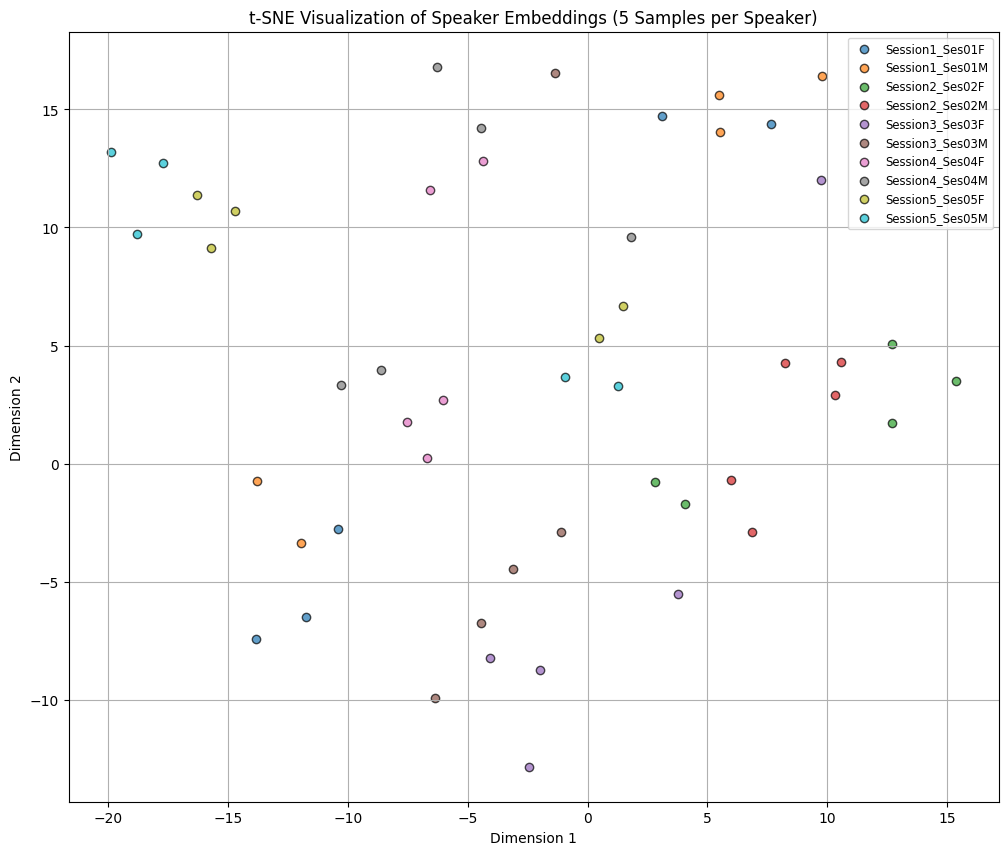

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Convert embeddings to NumPy
emb_array = torch.stack(embeddings).numpy()

# t-SNE projection
tsne = TSNE(n_components=2, perplexity=10, n_iter=50000, random_state=42)
proj_2d = tsne.fit_transform(emb_array)

# Plot
plt.figure(figsize=(12,10))
unique_labels = sorted(set(labels))
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for idx, label in enumerate(unique_labels):
    indices = [i for i, l in enumerate(labels) if l == label]
    x_vals, y_vals = proj_2d[indices, 0], proj_2d[indices, 1]
    plt.scatter(x_vals, y_vals, label=label, color=colors(idx), alpha=0.7, edgecolors='k')

plt.title("t-SNE Visualization of Speaker Embeddings (5 Samples per Speaker)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.show()
